In [27]:
import keras
from keras.models import Sequential,Model
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from cat_dog_data_loader import load_data
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # 确保实验的可重复性，换句话说，保证同样的代码每次运行出来的结果是一样的

In [36]:
BATCH_SIZE = 50

In [28]:
img_size = (64, 64)
data, labels = load_data('PetImages/train_set/cat_and_dog', img_size)
data /= 255
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42) #80%训练，20%测试

In [29]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(800, 64, 64, 3) (200, 64, 64, 3)
(800, 2) (200, 2)


In [ ]:
# def build_model():
#     model = Sequential()
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Dropout(0.3))

#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#     model.add(Dropout(0.5))
    
#     #把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5)) #在训练过程中每次更新参数时按一定概率（rate）随机断开输入神经元，Dropout层用于防止过拟合
# #     model.add(Dense(1, activation='sigmoid'))
#     model.add(Dense(2, activation='softmax'))

#     model.compile(optimizer=Adam(lr=0.0003), loss='binary_crossentropy', metrics=['accuracy']) #二分类
# #     model.compile(optimizer=RMSprop(decay=1e-6), loss='binary_crossentropy', metrics=['accuracy']) #二分类
    
#     return model

In [11]:
# def VGG_16(weights_path=None):
#     model = Sequential()
#     model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))
#     model.add(Conv2D(64, (3, 3), activation='relu', name='conv1_1'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(64, (3, 3), activation='relu', name='conv1_2'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(128, (3, 3), activation='relu', name='conv2_1'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(128, (3, 3), activation='relu', name='conv2_2'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_1'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_2'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(256, (3, 3), activation='relu', name='conv3_3'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_1'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_2'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv4_3'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_1'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_2'))
#     model.add(ZeroPadding2D((1, 1)))
#     model.add(Conv2D(512, (3, 3), activation='relu', name='conv5_3'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     if weights_path:
#         model.load_weights(weights_path)
    
#     return model

In [31]:
# model_vgg = VGG_16('keras_weights/vgg16_weights_tf_notop.h5')

# top_model = Sequential()
# top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
# top_model.add(Dense(512, activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(128, activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(1, activation='sigmoid'))
# top_model.summary()
# model_vgg.add(top_model)
# model_vgg.summary()

model_vgg = VGG16(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])
for layer in model_vgg.layers:
    layer.trainable = False

model = model_vgg.output
# model = GlobalAveragePooling2D()(model) #全局空间平均池化层
model = Flatten()(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.5)(model)
predict = Dense(2, activation='softmax')(model)
model_vgg_pred = Model(inputs=model_vgg.input, outputs=predict)
model_vgg_pred.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [32]:
model_vgg_pred.compile(optimizer=RMSprop(decay=1e-6), loss='binary_crossentropy', metrics=['accuracy']) #二分类

 TensorBoard 的作用就是可以把复杂的神经网络训练过程给可视化，可以更好地理解，调试并优化程序。 
TensorBoard可以将训练过程中的各种绘制数据展示出来，包括标量（scalars），图片（images），音频（Audio）,计算图（graph）,数据分布（distribution），直方图（histograms）和嵌入式向量（embedding）。

在 scalars 下可以看到 accuracy，cross entropy，dropout，layer1 和 layer2 的 bias 和 weights 等的趋势。

在 images 和 audio 下可以看到输入的数据。展示训练过程中记录的图像和音频。 

在 graphs 中可以看到模型的结构。 

在 histogram 可以看到 activations，gradients 或者 weights 等变量的每一步的分布，越靠前面就是越新的步数的结果。展示训练过程中记录的数据的分布图 
distribution 和 histogram 是两种不同的形式，可以看到整体的状况。 

在 embedding 中可以看到用 PCA 主成分分析方法将高维数据投影到 3D 空间后的数据的关系。 

Event: 展示训练过程中的统计数据（最值，均值等）变化情况

使用TensorBoard展示数据，需要在执行Tensorflow计算图的过程中，将各种类型的数据汇总并记录到日志文件中。然后使用TensorBoard读取这些日志文件，解析数据并生产数据可视化的Web页面，让我们可以在浏览器中观察各种汇总数据。 

In [48]:
#cmd: tensorboard --logdir="./logs"
from keras.callbacks import TensorBoard
# 设置log的存储位置，将网络权值以图片格式保持在tensorboard中显示，设置每一个周期计算一次网络的权值，每层输出值的分布直方图
tbCallbacks = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
model_vgg_pred.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=5, validation_data=(x_test, y_test), callbacks=[tbCallbacks])

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 262s 328ms/step - loss: 0.2418 - acc: 0.8962 - val_loss: 0.2582 - val_acc: 0.8900
Epoch 2/5
800/800 [==============================] - 261s 326ms/step - loss: 0.2240 - acc: 0.9062 - val_loss: 0.5458 - val_acc: 0.7600
Epoch 3/5
800/800 [==============================] - 259s 324ms/step - loss: 0.2487 - acc: 0.8850 - val_loss: 0.2599 - val_acc: 0.8850
Epoch 4/5
800/800 [==============================] - 261s 327ms/step - loss: 0.1425 - acc: 0.9487 - val_loss: 0.2201 - val_acc: 0.9050
Epoch 5/5
800/800 [==============================] - 263s 329ms/step - loss: 0.0908 - acc: 0.9713 - val_loss: 0.2015 - val_acc: 0.9200


fit(X, augment=False, rounds=1)：计算依赖于数据的变换所需要的统计信息(均值方差等),只有使用featurewise_center，featurewise_std_normalization或zca_whitening时需要此函数。

* X：numpy array，样本数据，秩应为4.在黑白图像的情况下channel轴的值为1，在彩色图像情况下值为3

* augment：布尔值，确定是否使用随即提升过的数据

* round：若设augment=True，确定要在数据上进行多少轮数据提升，默认值为1

* seed: 整数,随机数种子

flow(self, X, y, batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='jpeg')：接收numpy数组和标签为参数,生成经过数据提升或标准化后的batch数据,并在一个无限循环中不断的返回batch数据

* X：样本数据，秩应为4.在黑白图像的情况下channel轴的值为1，在彩色图像情况下值为3

* y：标签

* batch_size：整数，默认32

* shuffle：布尔值，是否随机打乱数据，默认为True

* save_to_dir：None或字符串，该参数能让你将提升后的图片保存起来，用以可视化

* save_prefix：字符串，保存提升后图片时使用的前缀, 仅当设置了save_to_dir时生效

* save_format："png"或"jpeg"之一，指定保存图片的数据格式,默认"jpeg"

* yields:形如(x,y)的tuple,x是代表图像数据的numpy数组.y是代表标签的numpy数组.该迭代器无限循环.

* seed: 整数,随机数种子

In [33]:
from keras.preprocessing.image import ImageDataGenerator
#基于生成器模型训练数据，可以提升效率，降低对物理服务器性能，尤其是内存的要求
datagen = ImageDataGenerator(
        #两个参数都是从数据集整体上对每张图片进行标准化处理
        #featurewise_center=True, #为使数据集去中心化（使得其均值为0）
        #featurewise_std_normalization=True, #将输入的每个样本除以其自身的标准差
        #rescale=1./255, #这个操作在所有其它变换操作之前执行
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range = 0.2,
        horizontal_flip=True
    )

# compute quantities required for featurewise normalization(std, mean, and principal components if ZCA whitening is applied)
#计算依赖于数据的变换所需要的统计信息(均值方差等),只有使用featurewise_center，featurewise_std_normalization或zca_whitening时需要此函数。
# datagen.fit(x_train, augment=True, rounds=2)
datagen.fit(x_train)

In [34]:
# fits the model on batches with real-time data augmentation:
history = model_vgg_pred.fit_generator(
            #接收numpy数组和标签为参数,生成经过数据提升或标准化后的batch数据,并在一个无限循环中不断的返回batch数据
            datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
            steps_per_epoch = x_train.shape[0] // BATCH_SIZE, #the number of batches to draw from the generator at each epoch.
            epochs = 5,
            validation_data = datagen.flow(x_test, y_test, batch_size=BATCH_SIZE),
            validation_steps = x_test.shape[0] // BATCH_SIZE  #需要从验证生成器中抽取validation_steps个批次用于评估
        )

Epoch 1/5
16/16 [==============================] - 135s 8s/step - loss: 1.2164 - acc: 0.5988 - val_loss: 0.5773 - val_acc: 0.6800
Epoch 2/5
16/16 [==============================] - 135s 8s/step - loss: 0.6297 - acc: 0.6925 - val_loss: 0.5174 - val_acc: 0.7600
Epoch 3/5
16/16 [==============================] - 134s 8s/step - loss: 0.5521 - acc: 0.7200 - val_loss: 0.4995 - val_acc: 0.7450
Epoch 4/5
16/16 [==============================] - 120s 7s/step - loss: 0.5671 - acc: 0.7063 - val_loss: 0.5211 - val_acc: 0.7550
Epoch 5/5
16/16 [==============================] - 123s 8s/step - loss: 0.5069 - acc: 0.7475 - val_loss: 0.6004 - val_acc: 0.7000


In [35]:
for layer in model_vgg_pred.layers[:8]:
    layer.trainable = False
    
for layer in model_vgg_pred.layers[8:]:
    layer.trainable = True

model_vgg_pred.compile(optimizer=SGD(lr=0.0003, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy']) #二分类

model_vgg_pred.fit_generator(
            #接收numpy数组和标签为参数,生成经过数据提升或标准化后的batch数据,并在一个无限循环中不断的返回batch数据
            datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
            steps_per_epoch = x_train.shape[0] // BATCH_SIZE, #the number of batches to draw from the generator at each epoch.
            epochs = 5,
            validation_data = datagen.flow(x_test, y_test, batch_size=BATCH_SIZE),
            validation_steps = x_test.shape[0] // BATCH_SIZE  #需要从验证生成器中抽取validation_steps个批次用于评估
    )

Epoch 1/5
16/16 [==============================] - 230s 14s/step - loss: 0.5003 - acc: 0.7625 - val_loss: 0.4079 - val_acc: 0.7700
Epoch 2/5
16/16 [==============================] - 262s 16s/step - loss: 0.4218 - acc: 0.8025 - val_loss: 0.4635 - val_acc: 0.7900
Epoch 3/5
16/16 [==============================] - 240s 15s/step - loss: 0.3541 - acc: 0.8462 - val_loss: 0.4512 - val_acc: 0.7850
Epoch 4/5
16/16 [==============================] - 231s 14s/step - loss: 0.4041 - acc: 0.8312 - val_loss: 0.3551 - val_acc: 0.8150
Epoch 5/5
16/16 [==============================] - 255s 16s/step - loss: 0.3523 - acc: 0.8337 - val_loss: 0.3760 - val_acc: 0.8100


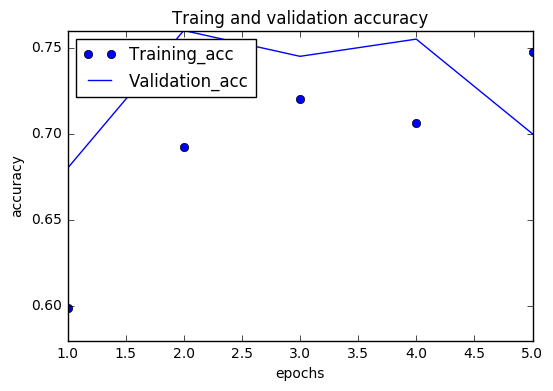

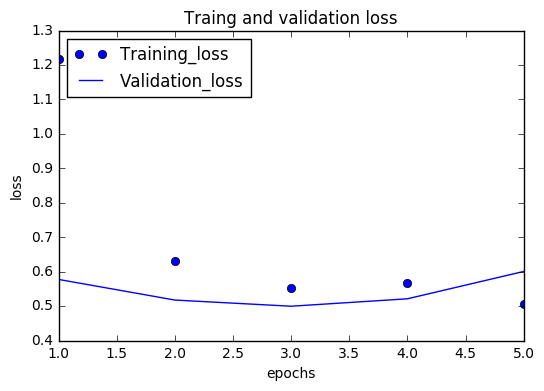

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Traing and validation accuracy')
plt.legend(loc='upper left')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Traing and validation loss')
plt.legend(loc='upper left')
plt.show()

训练（train）和验证（evaluate/validate）的逻辑近乎一样，训练要更新权重，但是验证过程，仅仅更新网络状态，不涉及权重（loss以及acc参数）信息的更新

In [38]:
score = model_vgg_pred.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
# score = model_vgg_pred.evaluate_generator(datagen.flow(x_test, y_test,batch_size=BATCH_SIZE), 
#                                 steps=x_test.shape[0]//BATCH_SIZE) #batches of samples
print(model_vgg_pred.metrics_names[0],":",score[0])
print(model_vgg_pred.metrics_names[1],":",score[1])

200/200 [==============================] - 26s 130ms/step
loss : 0.276583902538
acc : 0.870000004768


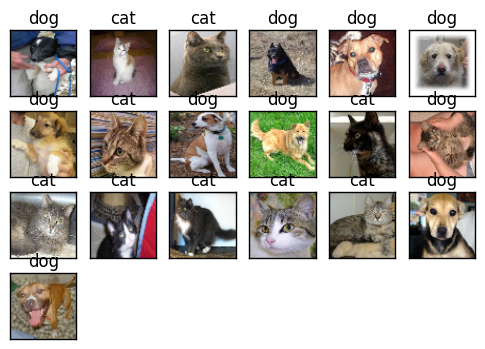

In [49]:
import os
from skimage.transform import resize

test_folder = 'PetImages/images/test'
file_list = os.listdir(test_folder)
cols = 6
rows = len(file_list) // cols + 1
for i,fname in enumerate(file_list):
    img_file = os.path.join(test_folder, fname)
    src_img = plt.imread(img_file)
    dest_img = resize(src_img, (img_size[0], img_size[1], 3))
    plt.subplot(rows, cols , i+1)
    plt.imshow(dest_img)
    img = dest_img.reshape((1,)+dest_img.shape)
    #0=猫，1=狗
    result = model_vgg_pred.predict(img, verbose=0) #输出预测概率
    if result.argmax(axis=1) == 0:
        plt.title('cat')
    else:
        plt.title('dog')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [51]:
from keras.utils import plot_model
plot_model(model_vgg_pred, to_file='imgs/cat_dog_model.png')

In [50]:
model_vgg_pred.save('./saved_model/cat_and_dog.h5')